In [4]:
# !pip3 install -U git+https://github.com/PYFTS/pyFTS

  Cloning https://github.com/PYFTS/pyFTS to /tmp/pip-req-build-pzxz2a1v
  Running command git clone -q https://github.com/PYFTS/pyFTS /tmp/pip-req-build-pzxz2a1v


In [11]:
import warnings
warnings.filterwarnings('ignore')


import matplotlib.pylab as plt

%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [19]:
import pandas as pd

pd.options.display.max_rows = 9999
df = pd.read_csv('Population.csv')

print(df)

   YEAR POPULATION
0  2006  3,233,366
1  2007  3,321,854
2  2008  3,412,667
3  2009  3,506,165
4  2010  3,602,121
5  2011  3,700,219
6  2012  3,799,996
7  2013  3,898,048
8  2014  4,012,946
9  2015  4,122,820


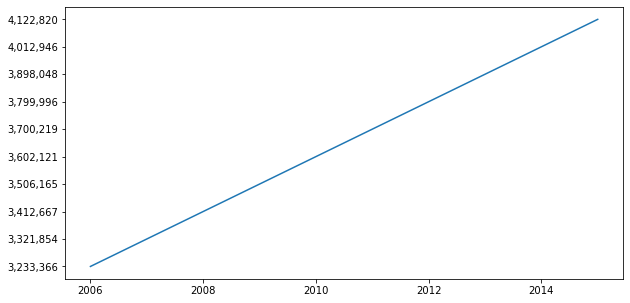

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('Population.csv')
plt.subplots(nrows=1, ncols=1, figsize=[10,5])

#df = Population.get_dataframe()
plot(df['YEAR'],df['POPULATION'])
#plot(df['Year'],df['Enrollments'])

#data = df['Population'].values

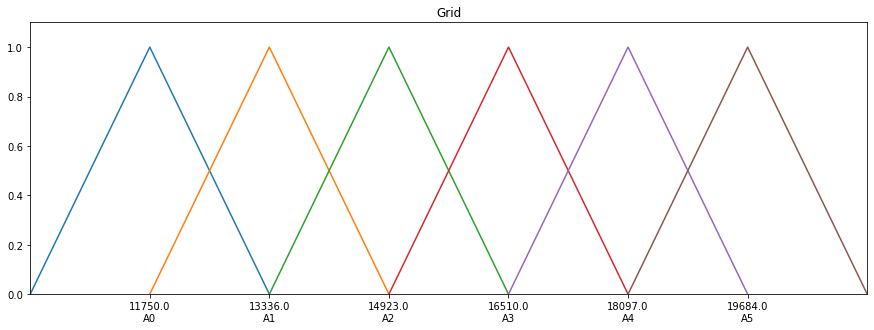

In [48]:
from pyFTS.partitioners import Grid

fs = Grid.GridPartitioner(data=data,npart=6)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

fs.plot(ax)

In [50]:
fuzzyfied = fs.fuzzyfy(data, method='maximum', mode='sets')

fuzzyfied

['A1',
 'A1',
 'A1',
 'A2',
 'A2',
 'A2',
 'A2',
 'A3',
 'A3',
 'A3',
 'A3',
 'A2',
 'A2',
 'A2',
 'A2',
 'A3',
 'A3',
 'A4',
 'A5',
 'A5',
 'A5',
 'A4']

In [51]:
from pyFTS.common import FLR

patterns = FLR.generate_non_recurrent_flrs(fuzzyfied)

print([str(k) for k in patterns])

['A1 -> A1', 'A1 -> A2', 'A2 -> A2', 'A2 -> A3', 'A3 -> A3', 'A3 -> A2', 'A3 -> A4', 'A4 -> A5', 'A5 -> A5', 'A5 -> A4']


In [9]:
# !pip install SimpSOM
# !pip install keras
# !pip install tensorflow

     |████████████████████████████████| 489.6 MB 4.4 kB/s eta 0:00:01   |▋                               | 9.0 MB 640 kB/s eta 0:12:31     |▊                               | 11.2 MB 649 kB/s eta 0:12:17     |█▌                              | 23.0 MB 208 kB/s eta 0:37:22     |██▋                             | 40.3 MB 796 kB/s eta 0:09:25     |██▉                             | 43.7 MB 813 kB/s eta 0:09:09     |██████████▌                     | 160.5 MB 394 kB/s eta 0:13:54     |██████████▋                     | 162.7 MB 367 kB/s eta 0:14:50     |███████████▎                    | 172.5 MB 371 kB/s eta 0:14:15     |████████████▉                   | 196.3 MB 339 kB/s eta 0:14:24     |█████████████▋                  | 208.8 MB 526 kB/s eta 0:08:54     |██████████████                  | 214.4 MB 581 kB/s eta 0:07:54     |███████████████▍                | 235.0 MB 715 kB/s eta 0:05:57     |███████████████▉                | 241.7 MB 700 kB/s eta 0:05:55     |████████████████                | 24

     |████████████████████████████████| 146 kB 231 kB/s eta 0:00:01
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=2f91f86662d4bf7a30eba7bd9c17423926f679221118ec04accb15c7d4ba96f4
  Stored in directory: /home/lorens/.cache/pip/wheels/a0/16/9c/5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0


In [52]:
from pyFTS.models import chen

model = chen.ConventionalFTS(partitioner=fs)
model.fit(data)
print(model)

Conventional FTS:
A1 -> A1,A2
A2 -> A2,A3
A3 -> A2,A3,A4
A5 -> A4,A5
A4 -> A5



ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of ticklabels (11).

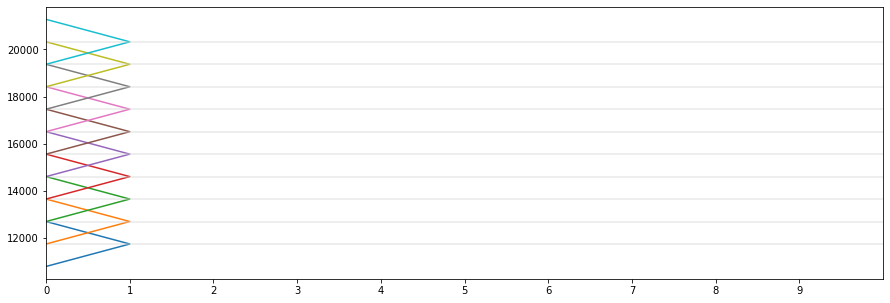

In [7]:
from pyFTS.common import Util

Util.plot_rules(model, size=[15,5] , rules_by_axis=10)

In [53]:
fuzzyfied = fs.fuzzyfy(18876, method='maximum', mode='sets')

print(fuzzyfied)


A4


In [54]:
model.predict([18097])

[19683.833333333336]

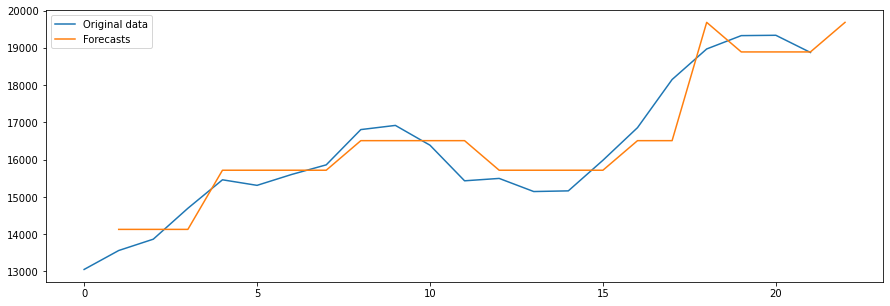

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

forecasts = model.predict(data)
forecasts.insert(0,None)

orig, = plot(data, label="Original data")
pred, = plot(forecasts, label="Forecasts")

legend(handles=[orig, pred])

Conventional FTS:
A1 -> A1,A2
A2 -> A2,A3
A3 -> A2,A3,A4
A4 -> A4



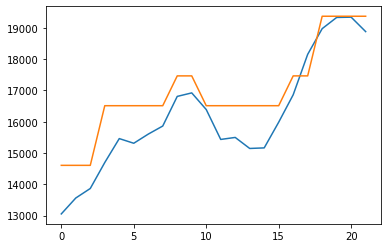

In [17]:
from pyFTS.data import Enrollments
from pyFTS.partitioners import Grid
from pyFTS.models import chen

train = Enrollments.get_data()

test = Enrollments.get_data()

#Universe of Discourse Partitioner
partitioner = Grid.GridPartitioner(data=train,npart=5)

# Create an empty model using the Chen(1996) method
model = chen.ConventionalFTS(partitioner=partitioner)

# The training procedure is performed by the method fit
model.fit(train)

#Print the model rules
print(model)

# The forecasting procedure is performed by the method predict
forecasts = model.predict(test)


#Plot 
plot(test)
plot(forecasts)